# Методы машинного обучения

## Домашнее задание 1

> ###   Выполнил _Жеглов Сергей_


<hr>

**Общая информация**

**Срок сдачи:** 2 Декабря 2018, 23:59 <br/>
**Ссылка для загрузки:** [туть](https://www.dropbox.com/request/zObuq9fK7ZqaRARBbRLK)

<hr>

**Правила оформления:** <br/>
* В названии ноутбука укажите свои имя и фамилию
* Перед сдачей проверьте, что ноутбук исполняется от начала до конца (Kernel - Restart and Run All)
* Перед сдачей проверьте, что ваши результаты репродуцируются (random_states EVERYWHERE)
* Отчищайте ноутбук перед сдачей (Cell - All Output - Clear)
* Не удаляйте ничего из исходного контента (если не требуется обратного)
* Крайне желательно следовать правилам PEP8

Имейте ввиду, что некоторые задания не имеют однозначного ответа. Сопровождайте ДЗ комментариями и илюстрациями в поддержку ваших выводов.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Прогнозирование спроса на аренду велосипедов

Данные: <a href="https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset">Bike Sharing Demand</a>.


In [3]:
df = pd.read_csv('./data/bikes.csv')

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Описание набора данных:
Набор данных предоставляет информацию о почасовой аренде велосипедов в течение двух лет в Вашингтоне, округ Колумбия. Для аренды использовались специальные киоски, которые давали возможность случайным прохожим и постоянным клиентам(имеющим регистрацию) взять велосипед на прокат. Данный процесс автоматизирован.

### Переменные:
- *datatime:*  дата
- *season:* сезон
  1. весна
  2. лето
  3. осень
  4. зима
- *yr* - год
  0. 2011
  1. 2012
- *mnt* - месяц
- *hr* - час
- *weekday* - день недели
- *holiday:* считается ли день праздником. В исходных данных 
  0. нет
  1. да
  
  
- *weathersit:* погода

  1. ясно, небольшая облачность, частичная облачность
  2. туман + облачность, туман + разорванные облака, туман + небольшая облачность, туман
  3. легкий снег, дождь + гроза + переменная облачность, небольшой дождь + вероятна облачность
  4. сильный дождь + ледяной дождь + гроза + туман, снег + тумат
  
  
- *temp:* нормированная температура (показания датчиков)
- *atemp:* нормированная "ощущаемая" температура
- *humidity:* относительная влажность
- *windspeed:* скорость ветра
- *workingday:* отметка, если день не выходной и не праздник  
- *casual:* количество незарегистрированных пользователей аренды
- *registered:* количество зарегистрированных пользователей аренды
- *cnt:* общее количество аренды

### Постановка задачи: <br>
Необходимо спрогнозировать спрос на велосипеды (признак cnt).

Разработанная модель может помочь выявить наиболее значимые признаки в прогнозировании спроса на прокатные велосипеды разных типов пользователей.

* casual - это незарегестрированные пользователи, которые, возможно, редко пользуются прокатом и им не выгодно оформлять абонемент
* registred - это пользователи, которые завели себе абонемент
* cnt - registred+casual

*Мы будем прогнозировать переменную cnt, и так как он напрямую состоит из registred и casual, то в модели эти признаки участвовать не могут*

Качество оценивается c помощью Root Mean Squared Logarithmic Error (RMSLE) - то есть недопрогноз в данном случае хуже, чем перепрогноз

In [4]:
df.loc[:, 'dteday'] = pd.to_datetime(df.dteday, format='%Y-%m-%d')

### Первичный анализ признаков:

Основные характеристики переменных и их описание.

#### Вещественные признаки

In [5]:
print(df.shape)
df.describe().T

(17379, 17)


,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


#### Категориальные признаки

In [6]:
for i in ["holiday", "season", "weathersit", "workingday"]:
    print('')
    print(i)
    print(df[i].value_counts())
    print('_____________________________________________')


holiday
0    16879
1      500
Name: holiday, dtype: int64
_____________________________________________

season
3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64
_____________________________________________

weathersit
1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64
_____________________________________________

workingday
1    11865
0     5514
Name: workingday, dtype: int64
_____________________________________________


**Внимание:** <br>
Присутствует редкая категория "4" в признаке "weathersit". <br>

#### Задание 1: Анализ линейных зависимостей в данных

Определите какие признаки имеют высокую корреляцию?

HINT: Для наглядности удобно использовать sns.heatmap()

### *Исключим из корреляционной матрицы признаки, которые точно не будут использованы в дальнейшем анализе - 'instant', 'casual', 'registered'.*

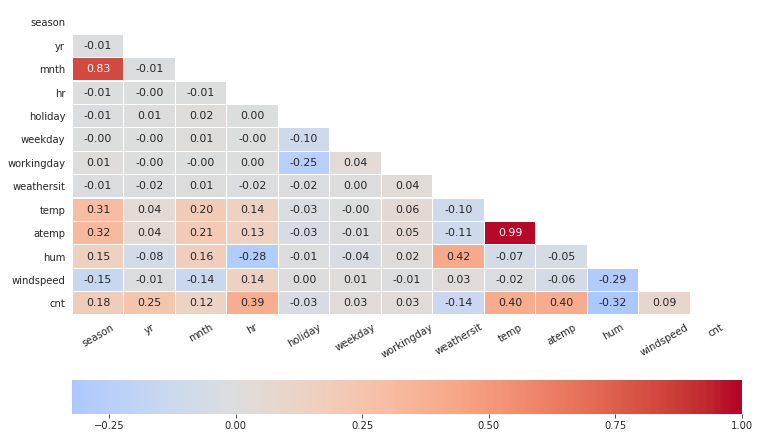

In [7]:
corr_matrix = df.drop(['instant', 'casual', 'registered'], axis = 1).corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr_matrix, center=0, annot = True, fmt=".2f", annot_kws={"size": 11}, linewidths=.3, cmap="coolwarm",
                     cbar_kws={"orientation": "horizontal"}, mask = mask)
    ax.set_xticklabels(corr_matrix.columns, rotation=30)

**Ваш вывод:** <br>


Как мы видим, оказалось две пары самых скоррелированных показателей - меясц('mnth') и сезон('season') - 0.83, температура ('temp') и ощущаемая температура ('atemp') - 0.99. Следовательно, на дальнейших этапах необходимо будет исключить из каждой пары один из показателей. Несколько удивляет низкая корреляция между покзателями, обозначающие рабочие, выходные дни и  дни недели (так, коэффициент между показателем буднего дня и показателем выходного дня равняется всего -0.25), поскольку, казалось, что от, как минимум, одного из них следует избавиться, но матрица говорит, что не стоит прибегать к данному шагу. 

Касательно корреляции предикторов с зависимой переменной, стоит сказать, что сильнее всего целевая переменная скоррелирована с температурными показателями и часом дня - около 0.40, с остальными предикторами коэффициент корреляции принимает значения, которые несколько ниже. Заметим также, что зависимая переменная имеет отрицательную корреляцию с влажностью и погодой - с последней это  объясняется тем, что значения порядкового признака погоды возрастают с ухдшением погоды (1 - ясно, 4 - сильный дождь).


#### Распределение некоторых признаков

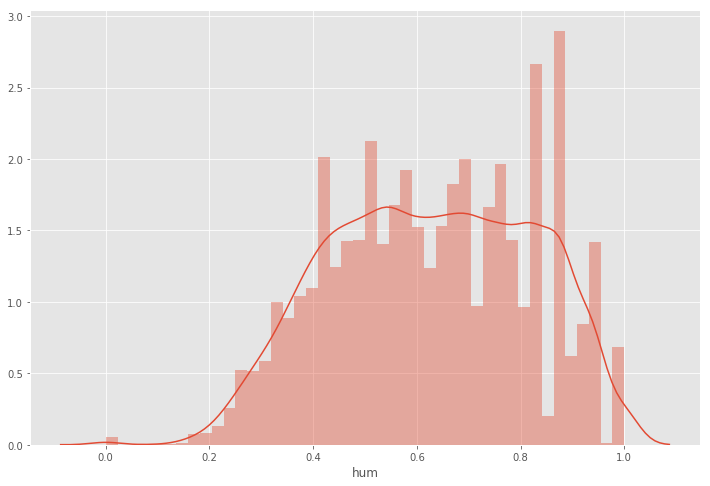

In [8]:
sns.distplot(df['hum'])

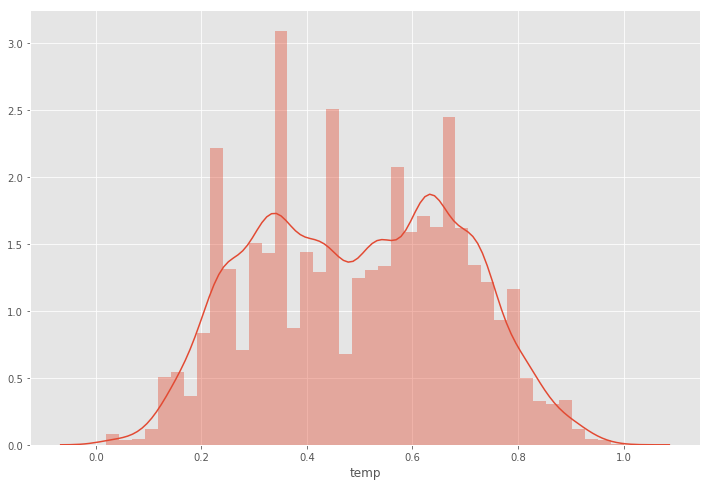

In [9]:
sns.distplot(df['temp'])

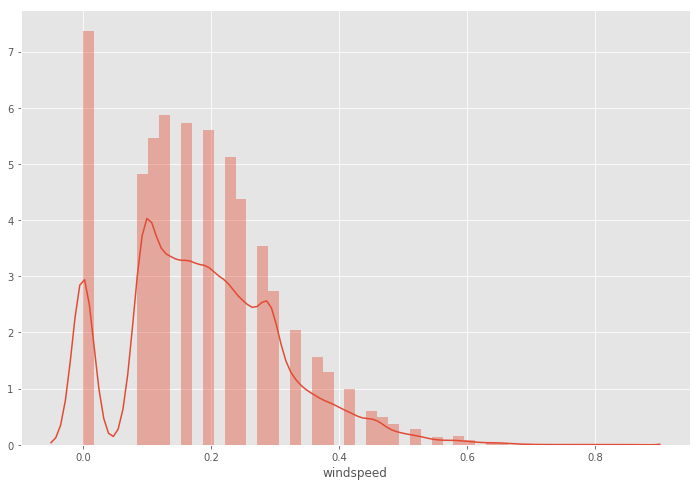

In [10]:
sns.distplot(df['windspeed'])

#### Парные распределения с целевыми признаками

#### Задание 2: Выясните, как менялся спрос на велосипеды со временем

* Постройте зависимость спроса от месяца и сезона (c учетом года)
* Постройте зависимость спроса от часа дня (c учетом года)

In [11]:
df.groupby(['yr', 'season', 'mnth'])['cnt'].mean()

yr  season  mnth
0   1       1        55.507267
            2        74.291217
            3        87.672340
            12       85.785441
    2       3        87.842308
            4       131.947149
            5       182.555108
            6       195.387500
    3       6       207.191667
            7       189.974462
            8       186.991792
            9       175.032381
    4       9       185.031250
            10      166.232840
            11      142.095967
            12      135.277083
1   1       1       130.558704
            2       149.041908
            3       210.561587
            12       78.656489
    2       3       242.484848
            4       242.651811
            5       263.259409
            6       285.766667
    3       6       273.591667
            7       273.665323
            8       288.310484
            9       298.687500
    4       9       317.010417
            10      280.848870
            11      212.623955
            12      21

Как мы видим, сезоны в обоих годах между собой перескаются - так, первый и четвертый сезон объединяет 12 месяц, первый и второй сезоны оба включают 3 месяц - это затрудняет построение единого графика зависимости спроса от месяца и сезона (c учетом года).

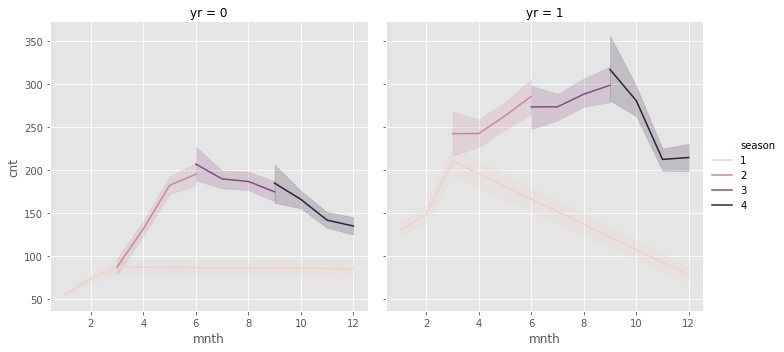

In [12]:
sns.relplot(x="mnth", y="cnt", hue="season", kind="line", col='yr', data=df)

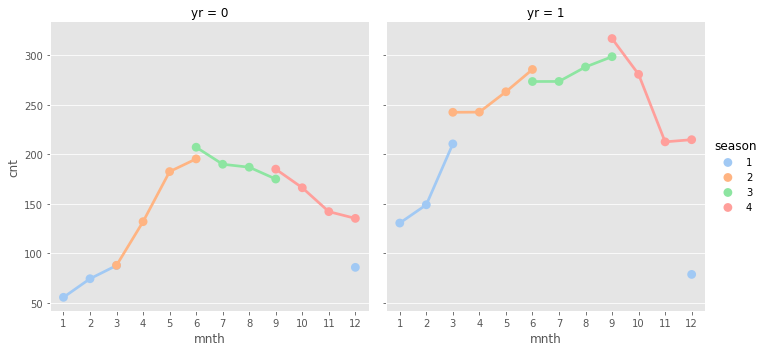

In [13]:
sns.catplot(x="mnth", y="cnt", hue="season", kind="point", col = 'yr', ci = False, palette="pastel", data=df)

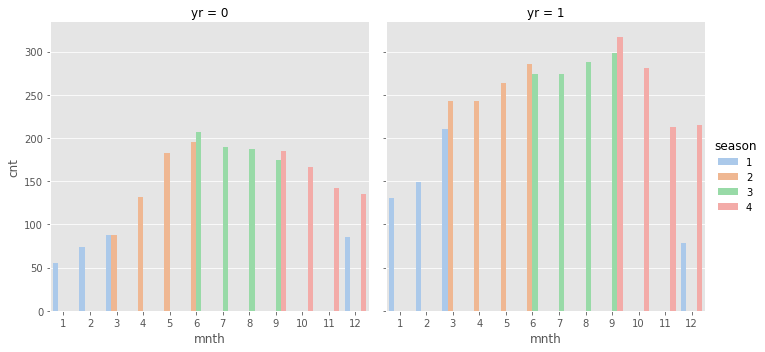

In [14]:
sns.catplot(x="mnth", y="cnt", hue="season", kind="bar", col = 'yr', ci = False, palette="pastel", data=df)

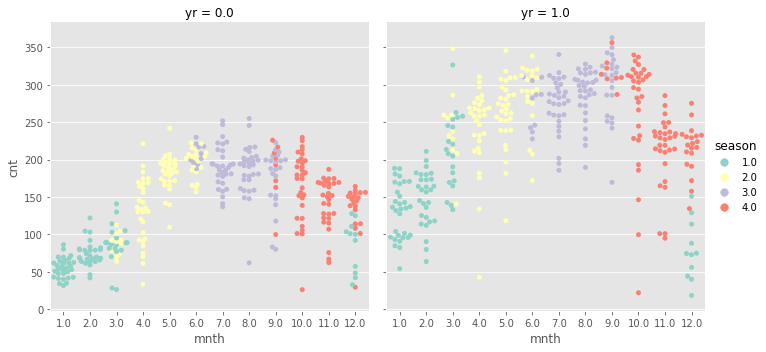

In [15]:
sns.catplot(x="mnth", y="cnt", hue="season", kind="swarm", col = 'yr', ci = False, palette="Set3",
            data=df.groupby(['dteday'])['cnt', 'mnth', 'season', 'yr'].mean()) # среднее по дням

График ниже отображает зависимость спроса от сезона (c учетом года).

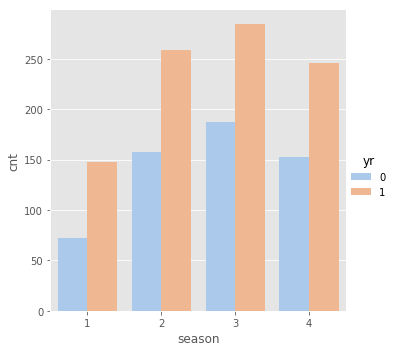

In [16]:
sns.catplot(x="season", y="cnt", hue="yr", kind="bar", ci = False, palette="pastel", data=df)

График ниже отображает зависимость спроса от месяца (c учетом года).

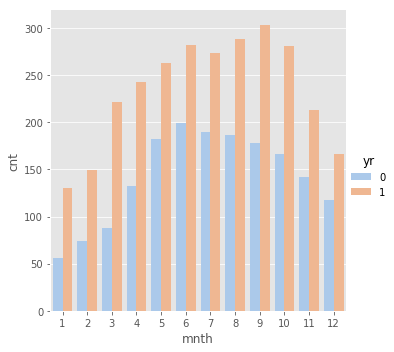

In [17]:
sns.catplot(x="mnth", y="cnt", hue="yr", kind="bar", ci = False, palette="pastel", data=df)

Графики зависимсоти спроса от часа дня (с учетом года) выглядят так:

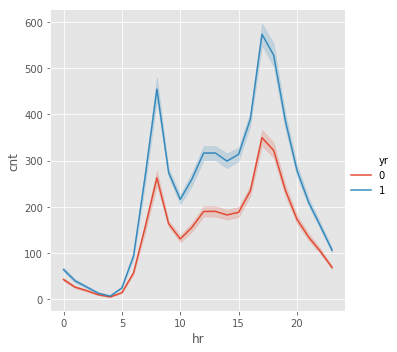

In [18]:
sns.relplot(x="hr", y="cnt", hue="yr", kind="line", data=df)

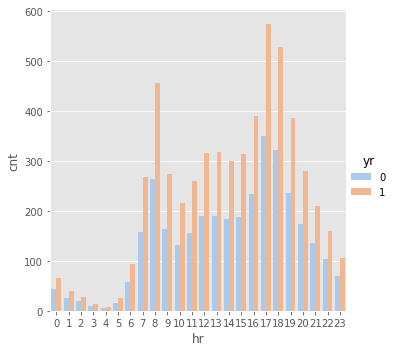

In [19]:
sns.catplot(x="hr", y="cnt", hue="yr", kind="bar", ci = False, palette="pastel", data=df)

**Ваш вывод**

На графиках сразу бросатся в глаза, что во второй год наблюдается значительно увеличение спроса на велосипеды по сравнению с первым. Также графики дают нам основание  в дальнейшем из двух скоррелированных переменных - сезон и месяц - отдать предпочтение месяцу, поскольку на самых первых графиках видно, что в одном сезоне могут наблюдаться значительные колебания целевого показателя в зависмости от месяца.

Касательно зависимости спроса на велосипеды по месяцам, заметим, что он начианет расти весною, но для первого года он стал снижаться уже в середине лета, а для второго года начал уменьшаться только после сентября. Целевой показатель также чувствителен к часу дня - оказывается, всплеск спроса на велосипеды наблюдается в утреннее (с 7:00 до 9:00) и в предвечернее время (с 16:00 до 19:00). Так или иначе, связь между целевым показателем и рассмотренными детерминантами представляется несколько непрямолинейной.


#### Задание 3: Визуальный анализ зависимости от погоды

* Визуализируйте зависимости спроса от температуры, силы ветра, влажности

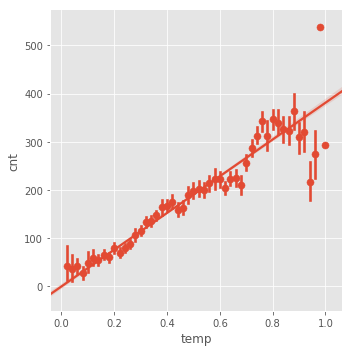

In [20]:
sns.lmplot(x='temp', y='cnt', data=df, x_estimator=np.mean)

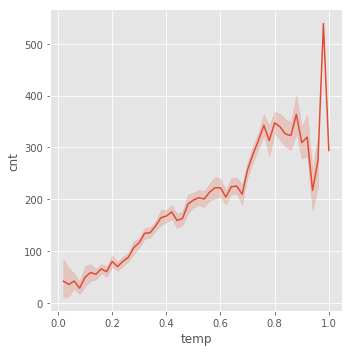

In [21]:
sns.relplot(x='temp', y='cnt', data=df, kind='line')

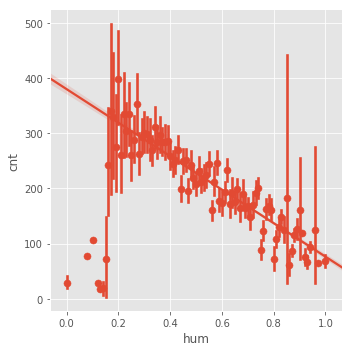

In [22]:
sns.lmplot(x='hum', y='cnt', data=df, x_estimator=np.mean)

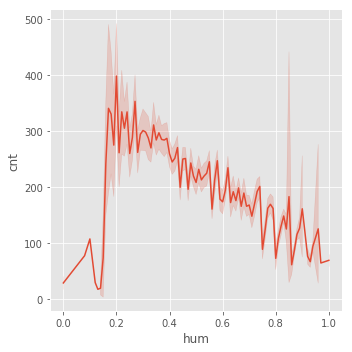

In [23]:
sns.relplot(x='hum', y='cnt', data=df, kind='line')

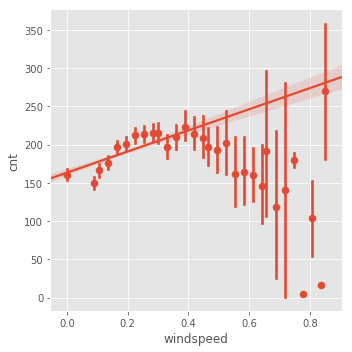

In [24]:
sns.lmplot(x='windspeed', y='cnt', data=df, x_estimator=np.mean)

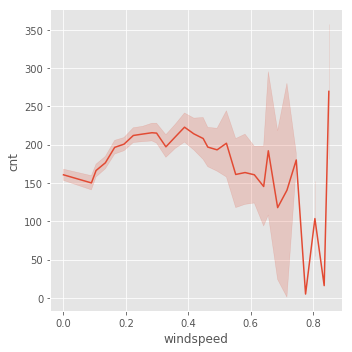

In [25]:
sns.relplot(x='windspeed', y='cnt', data=df, kind='line')

**Ваш вывод**

Как мы видим, на графиках прослеживается вполене четкая прямо пропорциональная связь целевого показателя с температурой воздуха и обратно пропорциональная связь с влажностью воздуха, хотя заметим, что при максимальных значениях температуры выражается некторый спад в значениях зависмой переменной, а при минимальных значениях влажности, наоборот, целевая переменная не слишом велика. Сказать что-то поределенное о свзяи между спросом на велосипеды и скоростью ветра представляется затруднительным, но все же на графиках видно, что целевой показатель несколько колеблется при значениях от 0 до 0.5 и начинает уменьшаться при достижении 0.5.

# Getting hands dirty

Давайте договоримся, что в качестве в тестовый датасет мы положим 20-31 числа каждого месяца.
А все остальное - в обучающую выборку

**Ремарка** <br/>
Такая поставновка задачи не очень реалистична, так как мы *заглядываем* в будущее. В реальности, в качестве тестового периода мы бы выбрали наиболее поздний период, например, конец 2012 года, а обучались бы на всем остальном.

Но для образовательных целей - сойдет.

#### Задание 4:

Создайте 2 датафрейма `df_train` и `df_test`

In [26]:
df_train = df[df['dteday'].dt.day<20]
df_test = df[df['dteday'].dt.day>=20]
df_train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [27]:
df_test.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
431,432,2011-01-20,1,0,1,0,0,4,1,1,0.26,0.2273,0.56,0.3881,5,8,13
432,433,2011-01-20,1,0,1,1,0,4,1,1,0.26,0.2727,0.56,0.0000,2,3,5
433,434,2011-01-20,1,0,1,2,0,4,1,1,0.26,0.2727,0.56,0.0000,0,2,2
434,435,2011-01-20,1,0,1,3,0,4,1,1,0.26,0.2576,0.56,0.1642,0,1,1
435,436,2011-01-20,1,0,1,4,0,4,1,1,0.26,0.2576,0.56,0.1642,0,1,1


#### Задание 5:

Напишите функцию `prepare_features` которая бы
* Удаляла ненужные признаки (сильно скоррелированные и просто бесполковые, типа дат)
* Оставляла только признак целевой признак cnt (а casual и registred удаляла)
* Вместо того, чтобы затачиваться на конкретный час (признак `hr`) создайте новую переменную (утро, день, вечер, ночь). Границы оцените интуитивно. Старую переменную удалите
* Опционально: создайте переменную, которая учитывает день недели и время

In [28]:
def prepare_features(df_input):
    df_output = df_input.copy()
    df_output.loc[:,'time_of_day'] = df_output.loc[:,'hr'].apply(lambda x: int(x/6)+1)
    # Создаем переменную времени суток: 00:00-05:59 - ночь (1), с 06:00-11:59 - утро (2), с 12:00-17:59 - день (3),
    #с 18:00-23:59 - вечер (4).
    df_output.loc[:,'weekday_time'] = df_output.loc[:,'weekday']*24+df_output.loc[:,'time_of_day']
    # Создаем перменную, которая учитывает день недели и время суток (ночь, утро, день, вечер) - соответственно, в каждом
    # дне недели сосредоточено 4 разных времен суток.
    
    df_output = df_output.drop(['dteday', 'instant', 'atemp', 'casual', 'registered', 'hr', 'season'], axis = 1)
    # избавляемся от лишних переменных ввиду бестолковости('dteday', 'instant'),
    # неприменимости ('casual', 'registered')
    # высокой корреляции с оставленными в модели ('atemp', 'season')
    # и отпадшей в них необходимости ('hr')

    return df_output

In [29]:
df_train_clean = df_train.pipe(prepare_features)
df_test_clean = df_test.pipe(prepare_features)

## Baseline modelling

Перед тем как применять какое-либо машинное обучение попробуйте сделать что-то без него

Например, в данном случае можно придумать так - 
* По обучающей выборке запоминаем сколько в среднем арендовывали велосипеды по каждой комбинации (год, месяц, день недели, время суток)
* Для теста просто копируем соответствующие значения

#### Задание 6: 
* Посчитайте средний спрос для всех космбинаций (год, месяц, день недели,  время суток). HINT: `df.groupby`
* Подцепите соответствующие "предсказания" к тестовой выборке. HINT: `df.join`
* Посчитайте ошибку RMSLE

In [30]:
from sklearn.metrics import mean_squared_log_error

In [31]:
prediction_base = pd.DataFrame(df_train_clean.groupby(['yr', 'mnth', 'weekday', 'time_of_day'])['cnt'].mean())
prediction_base.head(10)

cnt
yr mnth weekday time_of_day           
0  1    0       1            11.882353
                2            28.555556
                3            85.444444
                4            31.833333
        1       1             4.625000
                2            61.166667
                3            81.055556
                4            57.555556
        2       1             4.222222
                2            89.166667

In [32]:
df_test_clean_prediction = df_test_clean.join(prediction_base, on = ['yr', 'mnth', 'weekday', 'time_of_day'],
                                              rsuffix='_base_prediction', lsuffix='_test')
df_test_clean_prediction.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt_test,time_of_day,weekday_time,cnt_base_prediction
431,0,1,0,4,1,1,0.26,0.56,0.3881,13,1,97,3.909091
432,0,1,0,4,1,1,0.26,0.56,0.0000,5,1,97,3.909091
433,0,1,0,4,1,1,0.26,0.56,0.0000,2,1,97,3.909091
434,0,1,0,4,1,1,0.26,0.56,0.1642,1,1,97,3.909091
435,0,1,0,4,1,1,0.26,0.56,0.1642,1,1,97,3.909091


In [33]:
rmsle_baseline = mean_squared_log_error(df_test_clean_prediction['cnt_test'].values,
                                        df_test_clean_prediction['cnt_base_prediction'].values)
print('RMSLE (Root Mean Squared Logarithmic Error) for baseline:', rmsle_baseline)

RMSLE (Root Mean Squared Logarithmic Error) for baseline: 0.7400498988962714


## Random Forest

In [34]:
X_train = df_train_clean.drop('cnt', axis = 1).values
X_test = df_test_clean.drop('cnt', axis = 1).values

y_train = df_train_clean.loc[:,'cnt'].values
y_test = df_test_clean.loc[:,'cnt'].values

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

Теперь попробуем использовать случайный лес и перебирать параметры с помощью RandomizedSearchCV и кросс-валидации **на обучающей выборке**

#### Задание 6: 
* В RF зафиксируйте количество `n_estimators = 500` и `random_state=123`
* Задайте `cv=KFold(5, shuffle=True, random_state=123)`
* В `RandomizedSearchCV` установите `scoring='neg_mean_squared_log_error'` и перебирайте `max_depth`, `min_samples_split`, `min_samples_leaf`, задав для каждого гиперпараметра некоторое распределение
* Установите перебор 100 различных комбинаций

In [36]:
from scipy.stats import randint as randint

In [37]:
param_grid = {
    'max_depth':randint(2, 15),
    'min_samples_split':randint(2, 15),
    'min_samples_leaf':randint(1, 20)}

cv = KFold(5, shuffle=True, random_state=123)
model = RandomForestRegressor(n_estimators=500, random_state=123)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100, n_jobs=-1,
                                   cv=cv, scoring = 'neg_mean_squared_log_error', random_state=123)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators...
                   param_distributions={'max_depth': <scipy.stats._distn_infrastruct

In [38]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=123, verbose=0,
                      warm_start=False)

In [39]:
random_search.best_score_

-0.495565496067016

In [40]:
random_search.best_params_

{'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [41]:
random_search.cv_results_['params'][random_search.best_index_]

{'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 2}

#### Задание 7: 
Для лучшей модели
* Обучите ее на обучающей выборке целиком
* Выведите названия наиболее важных признаков
* Оцените качество на тестовой выборке и сравните с baseline

In [42]:
model_final = random_search.best_estimator_
model_final.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=123, verbose=0,
                      warm_start=False)

             importance
time_of_day    0.416939
temp           0.186845
yr             0.110981
hum            0.105965
mnth           0.061433


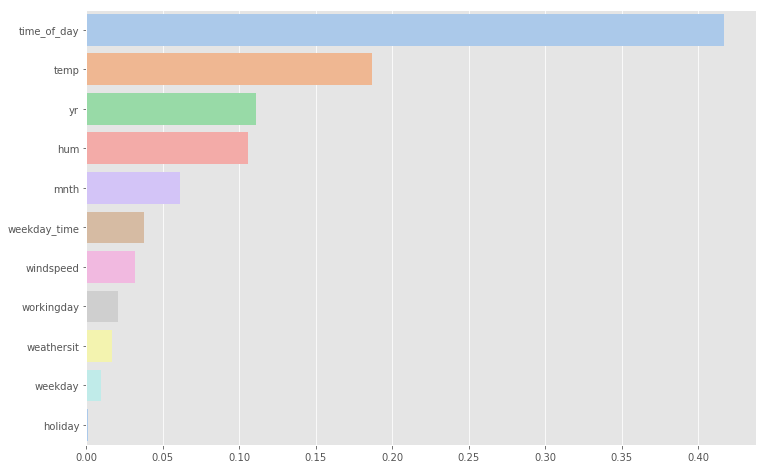

In [43]:
feat_importances = pd.DataFrame(model_final.feature_importances_,
                                   index = df_train_clean.drop('cnt', axis = 1).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feat_importances.head())
ax = sns.barplot(feat_importances.importance.values, feat_importances.index, palette="pastel")

In [44]:
# без season с workingday
rf_prediction = model_final.predict(X_test)
rmsle_rf = mean_squared_log_error(y_test,rf_prediction)
print('RMSLE (Root Mean Squared Logarithmic Error) for RandomForest:', rmsle_rf)
print('RMSLE (Root Mean Squared Logarithmic Error) for baseline:', rmsle_baseline)

RMSLE (Root Mean Squared Logarithmic Error) for RandomForest: 0.6319277138394362
RMSLE (Root Mean Squared Logarithmic Error) for baseline: 0.7400498988962714


## **Ваш вывод**

Как мы видим, у деревья решений ошибка прогнозирования оказалась меньше, чем у baseline модели (0.632 против 0.74), что свидетельствует явно в пользу применения деревьев решений. Тем не менее, заметим, что пронозы baseline модели строились только на основе четырех переменных (год, месяц, день недели, час) в то время, как алгоритм деревьев решений охватил большее число переменных.

Также обратим внимание на то, что, возможно, стоило бы преобразовать ряд категориальных переменных (месяц, день недели, время суток), выраженных в базае в целочисленном виде, в набор бинарных переменных, но деревья решений спосбоны справится с обучением и на уже предложенных данных.

Для алгоритма деревьев решений самыми значимыми переменными оказываются время суток, температура, год и влажность.